### SVC - Support Vector Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

from scipy import stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from itertools import takewhile

In [2]:
# Loading metadata
metadata = np.loadtxt('../Data/HT_Sensor_metadata.dat', skiprows=1, dtype=str)

# Loading dataset
dataset = np.loadtxt('../Data/HT_Sensor_dataset.dat', skiprows=1)

In [3]:
# Assigning heading to each column in metadata and dataset

df_metadata = pd.DataFrame(metadata, columns = ['ID', 'Date', 'Class', 't0', 'dt']) 
df_dataset = pd.DataFrame(dataset, columns = ['ID', 'Time', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp', 'Humidity'])

In [4]:
# Assigning each class a number

df_metadata.loc[df_metadata['Class'] == 'wine', 'Class'] = 0
df_metadata.loc[df_metadata['Class'] == 'banana', 'Class'] = 1
df_metadata.loc[df_metadata['Class'] == 'background', 'Class'] = 2

In [5]:
# Merging Metadata and Dataset to create full data using 'ID'

df_metadata.ID = df_metadata.ID.astype(int)
df_dataset.ID = df_dataset.ID.astype(int)

df_fulldata = pd.merge(df_metadata, df_dataset, on='ID')
print(df_fulldata.head())
print(df_fulldata.tail())

   ID      Date Class     t0    dt      Time       R1       R2       R3  \
0   0  07-04-15     1  13.49  1.64 -0.999750  12.8621  10.3683  10.4383   
1   0  07-04-15     1  13.49  1.64 -0.999472  12.8617  10.3682  10.4375   
2   0  07-04-15     1  13.49  1.64 -0.999194  12.8607  10.3686  10.4370   
3   0  07-04-15     1  13.49  1.64 -0.998916  12.8602  10.3686  10.4370   
4   0  07-04-15     1  13.49  1.64 -0.998627  12.8595  10.3688  10.4374   

        R4       R5       R6       R7       R8     Temp  Humidity  
0  11.6699  13.4931  13.3423  8.04169  8.73901  26.2257   59.0528  
1  11.6697  13.4927  13.3412  8.04133  8.73908  26.2308   59.0299  
2  11.6696  13.4924  13.3405  8.04101  8.73915  26.2365   59.0093  
3  11.6697  13.4921  13.3398  8.04086  8.73936  26.2416   58.9905  
4  11.6699  13.4919  13.3390  8.04087  8.73986  26.2462   58.9736  
        ID      Date Class     t0    dt      Time       R1       R2       R3  \
928986  99  09-17-15     2  11.93  0.68  1.675182  12.6224  1

In [6]:
# Defining an equation to find the index of of the time when induction started

def fnd_zero(l, b): return len([x for x in takewhile(lambda x: x[1] <= b, enumerate(l))])

In [7]:
pre_cut = 1000
post_cut = 5000
int_data = lambda df, pre_cut, post_cut, key: df[key - pre_cut : key + post_cut]

NewDf_fulldata = pd.DataFrame()
for _, temp_df in df_fulldata.groupby('ID'):
    zero_loc = fnd_zero(temp_df.Time,0.0)
    #print(temp_df.shape)
    NewTemp_df = int_data(temp_df, pre_cut, post_cut, zero_loc)
    #print(NewTemp_df.shape)
    frames = [NewDf_fulldata, NewTemp_df]
    NewDf_fulldata = pd.concat(frames)
NewDf_fulldata.head()

NewDf_fulldata.shape
newDf_data = NewDf_fulldata.iloc[:,1:]
newDf_class = NewDf_fulldata.iloc[:,1]

NewClass_Val = newDf_class.values
NewData_Val = newDf_data.values

Newx_train, Newx_test, Newy_train, Newy_test = train_test_split(NewData_Val, NewClass_Val, test_size = 0.2)

In [8]:
# Creating proper format of data as well as removing unnecessary columns.

df_fulldata.Class = df_fulldata.Class.astype(int)
df_fulldata.drop(['Date', 't0', 'dt'],axis = 1, inplace=True)

In [9]:
df_fulldata.head()

,ID,Class,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
0,0,1,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,1,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,1,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,1,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,1,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [10]:
df_fulldata = NewDf_fulldata

In [11]:
df_fulldata.head()

,ID,Date,Class,t0,dt,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
2429,0,07-04-15,1,13.49,1.64,-0.280824,13.0840,10.6140,10.6912,11.9494,13.8121,13.6627,8.30774,9.01964,26.0514,58.7386
2430,0,07-04-15,1,13.49,1.64,-0.280546,13.0844,10.6147,10.6924,11.9507,13.8137,13.6645,8.30791,9.01980,26.0484,58.7457
2431,0,07-04-15,1,13.49,1.64,-0.280268,13.0850,10.6155,10.6933,11.9519,13.8152,13.6658,8.30835,9.01980,26.0457,58.7521
2432,0,07-04-15,1,13.49,1.64,-0.279979,13.0858,10.6163,10.6941,11.9526,13.8162,13.6668,8.30802,9.01964,26.0432,58.7579
2433,0,07-04-15,1,13.49,1.64,-0.279701,13.0860,10.6168,10.6946,11.9532,13.8172,13.6681,8.30817,9.01965,26.0410,58.7631


In [12]:
# Creating proper format of data as well as removing unnecessary columns.

df_fulldata.Class = df_fulldata.Class.astype(int)
df_fulldata.drop(['Date', 't0', 'dt'],axis = 1, inplace=True)

In [13]:
corr = df_fulldata.corr()

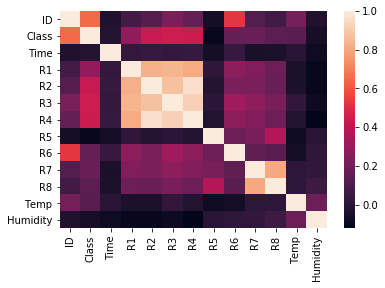

In [14]:
sns.heatmap(corr)

In [15]:
corr

,ID,Class,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
ID,1.000000,0.649941,-0.026158,0.076061,0.128756,0.229448,0.170158,-0.058026,0.529703,0.115534,0.071173,0.215241,-0.027165
Class,0.649941,1.000000,-0.014058,0.285849,0.432059,0.447506,0.442038,-0.100826,0.167588,0.181322,0.148335,0.138938,-0.054261
Time,-0.026158,-0.014058,1.000000,0.026923,0.038379,0.029867,0.039473,-0.064110,0.040467,-0.046288,-0.040602,-0.002409,-0.079412
R1,0.076061,0.285849,0.026923,1.000000,0.828245,0.838538,0.814587,0.014212,0.263800,0.240420,0.187642,-0.040154,-0.100993
R2,0.128756,0.432059,0.038379,0.828245,1.000000,0.876437,0.961461,-0.013916,0.226484,0.229744,0.179761,-0.041499,-0.102425
R3,0.229448,0.447506,0.029867,0.838538,0.876437,1.000000,0.918304,0.002915,0.327253,0.280860,0.220122,0.026279,-0.083182
R4,0.170158,0.442038,0.039473,0.814587,0.961461,0.918304,1.000000,-0.019640,0.270534,0.245876,0.186873,-0.019657,-0.122171
R5,-0.058026,-0.100826,-0.064110,0.014212,-0.013916,0.002915,-0.019640,1.000000,0.187497,0.220201,0.375443,-0.078582,-0.001620
R6,0.529703,0.167588,0.040467,0.263800,0.226484,0.327253,0.270534,0.187497,1.000000,0.155484,0.136672,-0.068049,0.017435
R7,0.115534,0.181322,-0.046288,0.240420,0.229744,0.280860,0.245876,0.220201,0.155484,1.000000,0.802782,0.012346,0.023263


In [16]:
label_encoder = LabelEncoder()
df_fulldata.iloc[:,0] = label_encoder.fit_transform(df_fulldata.iloc[:,0]).astype('float64')

cols = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if cols[j]:
                cols[j] = False
sel_cols = df_fulldata.columns[cols]
df_fulldata = df_fulldata[sel_cols]

sel_cols = sel_cols[1:].values

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [17]:
SL = 0.05
data_modeled, sel_cols = backwardElimination(df_fulldata.iloc[:,1:].values, df_fulldata.iloc[:,0].values, SL, sel_cols)

In [18]:
result = pd.DataFrame()
result['Class'] = df_fulldata.iloc[:,0]

data = pd.DataFrame(data = data_modeled, columns = sel_cols)

In [19]:
data.head()

,Class,Time,R1,R5,R6,R7,Temp,Humidity
0,1.0,-0.280824,13.0840,13.8121,13.6627,8.30774,26.0514,58.7386
1,1.0,-0.280546,13.0844,13.8137,13.6645,8.30791,26.0484,58.7457
2,1.0,-0.280268,13.0850,13.8152,13.6658,8.30835,26.0457,58.7521
3,1.0,-0.279979,13.0858,13.8162,13.6668,8.30802,26.0432,58.7579
4,1.0,-0.279701,13.0860,13.8172,13.6681,8.30817,26.0410,58.7631


In [20]:
x_train_fea, x_test_fea, y_train_fea, y_test_fea = train_test_split(data.values, result.values, test_size = 0.2)

In [22]:
start = time.time()
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train_fea, y_train_fea)
end = time.time()
print(end - start)

/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


438.53159070014954


In [23]:
start = time.time()
prediction = svc.predict(x_test_fea)
end = time.time()
print(end - start)

398.66009759902954


In [24]:
start = time.time()
cm = confusion_matrix(y_test_fea, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test_fea.shape[0]
print(accuracy)
end = time.time()
print(end - start)

0.9993948907733997
0.13072562217712402


### Random Forest

In [21]:
start = time.time()
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train_fea, y_train_fea)
end = time.time()
print(end - start)

/home/nrvptl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


238.58773469924927


In [22]:
start = time.time()
prediction = rf.predict(x_test_fea)
end = time.time()
print(end - start)

10.987017154693604


In [23]:
start = time.time()
cm = confusion_matrix(y_test_fea, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test_fea.shape[0]
print(accuracy)
end = time.time()
print(end - start)

1.0
0.12689638137817383
